# Uncovering patterns with PCA

**Objective: To cluster data on the nutritonal compositon of foods**

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [120]:
# Read data
data = pd.read_csv('nndb_flat.csv')
data.head(3)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909


# EDA

In [121]:
data.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


Data will need to be scaled

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


No nulls in numerical columns; 6 object columns

In [5]:
data.FoodGroup.value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

Too many FoodGroup types to OHE

In [122]:
data = data.set_index('ID')

In [123]:
# Drop non-numerical columns
data.drop(data.columns[:6].values, axis=1, inplace=True)

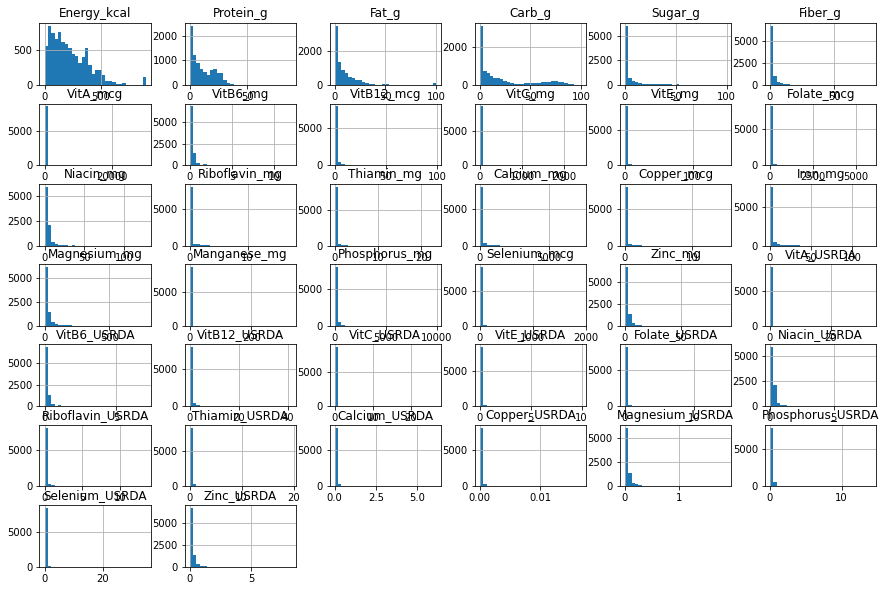

In [124]:
# Check distribution
data.hist(bins=30, figsize=(15, 10));

In many of the features the data is skewed to the right, not many outliers

# Transform data to normal distribution

In [171]:
# Add 1 to ensure figures are positive
data=data+1

# Transform right skew to normal dist using log
data_tf = data
for i in data_tf.columns.values:
    data_tf[i] = np.log(data_tf[i])

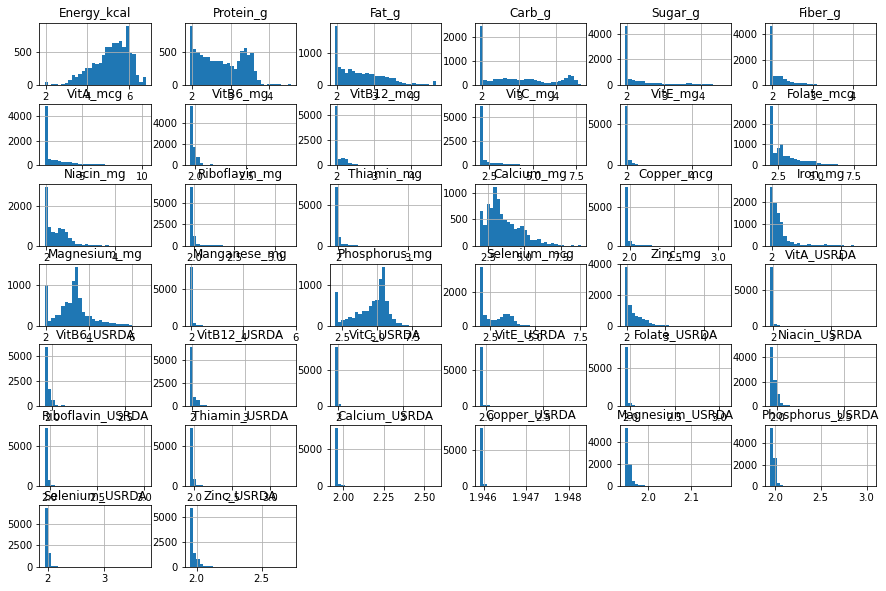

In [172]:
# Check skewness
data.hist(bins=30, figsize=(15, 10));

# Check for multi colinearity

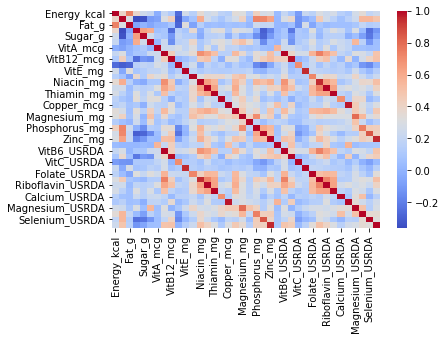

In [173]:
# check covariance to identify redundant features
heatmap = sns.heatmap(data.corr(), cmap="coolwarm", )

'_USRDA' columns are redundant

In [176]:
# Check with numerical figures for accuracy
corr_mat = data.corr()
sorted_mat = corr_mat.unstack().sort_values(ascending=False).head(40)
sorted_mat

Energy_kcal       Energy_kcal         1.000000
Manganese_mg      Manganese_mg        1.000000
Iron_mg           Iron_mg             1.000000
Copper_mcg        Copper_mcg          1.000000
Calcium_mg        Calcium_mg          1.000000
Thiamin_mg        Thiamin_mg          1.000000
Riboflavin_mg     Riboflavin_mg       1.000000
Niacin_mg         Niacin_mg           1.000000
Folate_mcg        Folate_mcg          1.000000
VitE_mg           VitE_mg             1.000000
VitC_mg           VitC_mg             1.000000
VitB12_mcg        VitB12_mcg          1.000000
VitB6_mg          VitB6_mg            1.000000
VitA_mcg          VitA_mcg            1.000000
Fiber_g           Fiber_g             1.000000
Sugar_g           Sugar_g             1.000000
Carb_g            Carb_g              1.000000
Magnesium_mg      Magnesium_mg        1.000000
Phosphorus_mg     Phosphorus_mg       1.000000
Protein_g         Protein_g           1.000000
Selenium_mcg      Selenium_mcg        1.000000
Selenium_USRD

In [179]:
# remove columns with _USRDA
data1 = data.loc[:, ~data.columns.str.contains('_USRDA')]

In [180]:
rows = list(data1.columns)

# Scale data

In [181]:
# Scale  data as PCA is sensitive to variance of features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

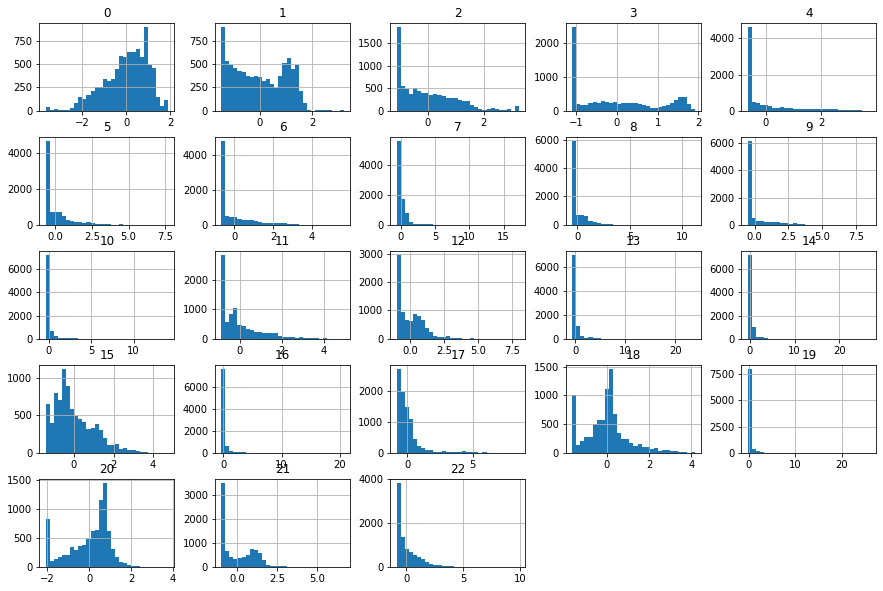

In [182]:
# Check scale and distribution
(pd.DataFrame(data_scaled)).hist(bins=30, figsize=(15, 10));

# Use PCA

In [210]:
# Instantiate the model and fit the data
pca = PCA()
pca.fit(data_scaled)

PCA()

In [211]:
# Access components
W = pca.components_

# Create DF of eigenvalues per feature per PC
W_df = pd.DataFrame(W.T,index=columns,
                 columns=[f'PC{i}' for i in range(1, 24)])
W_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Energy_kcal,0.205461,-0.012348,-0.488949,0.266065,-0.040207,-0.056399,0.086961,-0.022016,0.019302,-0.038296,...,0.118987,0.047518,-0.061663,-0.058469,-0.116880,0.199365,-0.232368,0.142395,0.194674,-0.610350
Protein_g,0.235171,-0.352304,-0.100946,-0.110969,0.070375,-0.073590,-0.044245,-0.078309,0.041771,0.074565,...,0.044339,-0.126643,-0.042384,-0.078537,-0.012987,-0.397975,-0.433586,0.378406,0.341138,0.366425
Fat_g,0.096529,-0.135525,-0.454873,0.300537,-0.320094,0.024866,-0.046425,0.113365,-0.068429,0.169982,...,-0.028735,0.180240,0.075321,-0.034904,0.147286,-0.154574,0.339877,-0.148197,-0.126751,0.398083
Carb_g,0.082797,0.424087,-0.225225,0.050662,0.191893,-0.100756,0.182863,-0.059021,0.011991,-0.178316,...,0.125926,-0.016559,-0.076456,0.031403,-0.191655,0.456790,-0.245179,-0.074777,-0.011376,0.554468
Sugar_g,0.025813,0.326706,-0.120808,0.299677,0.065860,-0.194099,0.292274,-0.466018,0.234898,-0.164774,...,-0.205287,-0.077149,0.098680,0.001857,0.106378,-0.422626,0.167094,0.051550,-0.013536,-0.055070
Fiber_g,0.144415,0.328725,-0.152428,-0.196318,0.149281,0.209273,-0.093389,-0.055156,-0.203961,0.118111,...,0.306113,-0.009674,0.419106,-0.173701,0.230285,-0.237149,-0.100626,-0.050225,-0.151487,-0.077853
VitA_mcg,0.104619,0.122891,0.241538,0.049616,-0.512510,-0.379321,0.091536,0.241794,0.146686,-0.088971,...,-0.270570,-0.192058,0.190920,-0.004552,-0.015054,0.028676,-0.132020,-0.011986,0.078852,0.009957
VitB6_mg,0.274875,0.027818,0.231900,0.221284,0.082662,0.098221,-0.231637,-0.132006,0.090037,-0.010107,...,-0.091599,0.482636,-0.132092,-0.298617,-0.250852,0.096129,0.248530,0.356496,-0.028874,0.059908
VitB12_mcg,0.203161,-0.201497,0.266826,0.146716,-0.162726,0.082534,0.377103,-0.152733,0.035395,0.007413,...,0.514598,0.191472,0.171096,0.367753,-0.245583,-0.076472,0.051169,-0.184131,0.133594,0.025204
VitC_mg,0.023405,0.253995,0.363884,0.011158,-0.171294,0.010309,-0.239388,-0.394853,-0.028647,0.167688,...,0.182226,-0.125515,0.043709,-0.058707,-0.026941,0.021180,-0.087620,0.020222,-0.030915,-0.004908


In [212]:
# Project dataset into new space of PCs
X_proj = pca.transform(data_scaled)

# PC scores per food item
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 24)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-1.847384,-0.299185,-1.567204,2.128269,-3.605360,-0.654370,-0.198259,1.784916,0.075671,0.387398,...,-0.564795,0.259862,0.508313,-0.132664,0.127156,0.120206,0.240455,-0.141989,-0.078619,-0.647538
1,-1.839828,-0.274832,-1.567051,2.124241,-3.604464,-0.631934,-0.178893,1.802651,0.060496,0.401951,...,-0.576725,0.217767,0.472773,-0.163067,0.117356,0.110845,0.263389,-0.130237,-0.067741,-0.647871
2,-2.439943,-0.300628,-1.639900,2.934143,-3.744524,0.081291,-0.131037,1.890817,0.064574,0.188229,...,-0.756526,0.023793,0.643840,-0.336473,0.233087,0.194098,0.172243,-0.161876,0.305600,-0.587725
3,1.238260,-1.178030,-0.873378,-0.583842,-2.237588,-2.669443,-0.143087,0.797940,0.190907,0.709397,...,-0.059571,0.938039,0.268624,-0.123677,0.424474,-0.127044,-0.275039,0.387848,0.004228,-0.049546
4,1.097700,-1.188880,-1.059247,-0.708499,-2.497498,-2.925275,-0.020131,0.794344,0.323098,1.045564,...,0.002916,0.673258,0.451785,-0.000503,0.371475,-0.007691,-0.298610,0.541432,0.064861,0.000350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.213980,-2.796516,0.039337,0.207720,-2.384975,-0.742894,0.336194,-0.424383,0.082853,-0.717812,...,2.283150,0.359301,0.569792,0.801960,-0.750559,-0.093743,1.300648,-0.538596,0.884331,-0.008042
8614,-0.192131,-1.874597,0.209678,-1.454353,0.398370,-0.414646,-0.033054,-0.483225,-0.122313,-0.987296,...,0.380306,-0.081066,0.076413,0.958579,-0.326472,0.076272,-0.007757,0.645997,0.055264,0.059595
8615,-2.286474,2.447217,-0.844067,1.619395,1.320552,-0.353048,1.820428,-1.281537,0.862790,-0.531790,...,-0.556699,-0.785448,-0.294480,0.155071,-0.335701,0.153260,0.528523,0.244039,0.592308,-0.431080
8616,0.796085,-1.101930,0.003940,-1.639108,-1.304977,0.429574,-1.038302,-0.448781,-0.767781,-0.873687,...,-0.518405,-1.765801,-0.635684,1.188209,0.063219,0.557878,1.037904,0.466917,1.147726,-0.047612


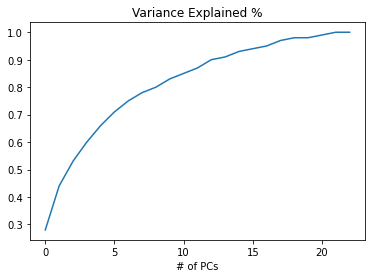

In [213]:
# Identfy variance per PC
var_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
plt.plot(var_cumsum)
plt.title('Variance Explained %')
plt.xlabel('# of PCs')
plt.show()

In [214]:
print(f' The first 5 eigenvectors explain {(pca.explained_variance_ratio_[:5].sum())*100} % of the variance')

 The first 5 eigenvectors explain 65.81383274388226 % of the variance


## First cluster - PC1

In [215]:
W_df.PC1.sort_values(ascending=False)

Niacin_mg        0.305891
Iron_mg          0.290738
Phosphorus_mg    0.287961
Riboflavin_mg    0.282902
Magnesium_mg     0.281713
Zinc_mg          0.275836
VitB6_mg         0.274875
Thiamin_mg       0.239502
Protein_g        0.235171
Folate_mcg       0.223963
Selenium_mcg     0.211586
Energy_kcal      0.205461
VitB12_mcg       0.203161
Copper_mcg       0.177017
Calcium_mg       0.163103
Fiber_g          0.144415
Manganese_mg     0.139579
VitA_mcg         0.104619
VitE_mg          0.101247
Fat_g            0.096529
Carb_g           0.082797
Sugar_g          0.025813
VitC_mg          0.023405
Name: PC1, dtype: float64

Cluster one contains foods high in Niacin, Iron and Phosphorus; low in VitC, Sugar and Carb